Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/04/21


In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression

%matplotlib inline

sb.set_style('darkgrid')
my_dpi = 76

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Sentiment Analysis Partie deux


## Question:
Which Logistic Regression model will perform better at sentiment analysis and why?

Three models will be used asses sentiment in sentences taken from three websites, IMDB, Amazon and yelp pertaining to product reviews. The models are;     
   1. Logistic regression
   2. Ridge logistic regression
   3. Lasso logistic regression

Ridge and Lasso can be carried out by specifying l1 or l2 regularization for sci  kit learn’s logistic  regression.



### Data:

Data can be found at the UC Irvine Machine Learning Repository [1].


### Context:

Sentiment analysis is important in analyzing Social Media that impacts a company’s bottom line.  If done correctly it can determine marketing strategy, and improve product messaging. 

### Content:

Each observation is a sentence from one of the three websites and a score. Score is either 1 (for positive) or 0 (for negative).  Sentences were extracted from reviews of products, movies, and restaurants. The CSV file contains 3000 observations with an equal number of positive and negative sentiment data points.

In [2]:
# Read CSV containing text data
data_file = '/media/ianh/space/ThinkfulData/Sentiment/sentiment_all.csv'
sntmnt = pd.read_csv(data_file)
print("\nObservations : %d\n" % (sntmnt.shape[0]))


Observations : 3000



## Preprocessing and exploratory data analysis

In [3]:
# Check for missing data
print("%s\n" % (sntmnt.isnull().sum()))

# Lets ensure that all columns are of the expected type object and int (or float)
print("\n%s\n" % (sntmnt.dtypes))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split

vect = CountVectorizer()
X = vect.fit_transform(sntmnt.text)

#Take a look at the resulting dataframe for training data
vectz_data = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
vectz_data.head()
cols = vectz_data.columns
print("length before pruning: %d" % (len(cols)))

def prune(cols, dataframe):
    for name in cols:
        if name.isdigit():
            dataframe.drop(name, axis=1, inplace=True)
    
prune(cols, vectz_data)
print("length after pruning: %d" % (len(vectz_data.columns)))

text      0
result    0
dtype: int64


text      object
result     int64
dtype: object

length before pruning: 5155
length after pruning: 5101


## Logistic Regression
The parameter "C" has been set to a very large number, which decreases the effectiveness of the regularization.
This is to ensure for this round l2 regularization does not come into play.

Mean accuracy of the model is: 0.79

Accuracy standard deviation for the model is: 0.03

----------------------------------------

Accuracy on training set: 1.000

Accuracy on test set: 0.791

RMSE of test set: 0.458


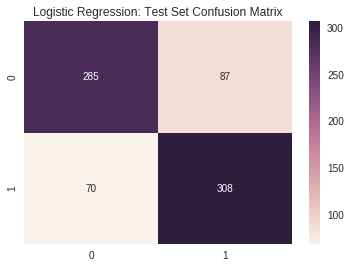

In [5]:
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import metrics

y = sntmnt.result
logreg = LogisticRegression(C=1e9)
results = cross_val_score(logreg, X, y, cv=15)

print("Mean accuracy of the model is: {:.2f}\n".format(np.mean(results)))
print("Accuracy standard deviation for the model is: {:.2f}\n".format(np.std(results)))
print("%s" % ('-' * 40))
# Fit the model and get predictions so that we can get the confusion matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
fit = logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
cnfsn_mtrx = metrics.confusion_matrix(y_test, predictions)
print("\nAccuracy on training set: {:.3f}".format(logreg.score(X_train, y_train)))
print("\nAccuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))

print('\nRMSE of test set: %.3f' % (np.sqrt(metrics.mean_squared_error(y_test, predictions))) )

# Display heatmap of confusion matrix
_ = sb.heatmap(cnfsn_mtrx, annot=True, fmt="d")
_ = plt.title("Logistic Regression: Test Set Confusion Matrix")

The plain logistic regression has a sensitivity of .81 and specificity of .77 and a misclassification rate of .21.  Not a very accurate  model for classifying sentiment. 

## Ridge logistic regression
Carried out by specifying the ‘l2’ for the penalty parameters and leaving the parameter C to its default.

Ridge Mean accuracy of the model is: 0.83

Rideg Accuracy standard deviation for the model is: 0.03

----------------------------------------

Ridge Accuracy on training set: 0.975

Ridge Accuracy on test set: 0.841

Ridge RMSE of test set: 0.398


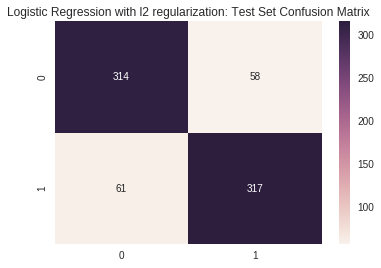

In [6]:
logreg = LogisticRegression(penalty='l2', C=.95)
results = cross_val_score(logreg, X, y, cv=15)

print("Ridge Mean accuracy of the model is: {:.2f}\n".format(np.mean(results)))
print("Rideg Accuracy standard deviation for the model is: {:.2f}\n".format(np.std(results)))
print("%s" % ('-' * 40))
# Fit the model and get predictions so that we can get the confusion matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
fit = logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
cnfsn_mtrx = metrics.confusion_matrix(y_test, predictions)
print("\nRidge Accuracy on training set: {:.3f}".format(logreg.score(X_train, y_train)))
print("\nRidge Accuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))

print('\nRidge RMSE of test set: %.3f' % (np.sqrt(metrics.mean_squared_error(y_test, predictions))) )

# Display heatmap of confusion matrix
_ = sb.heatmap(cnfsn_mtrx, annot=True, fmt="d")
_ = plt.title("Logistic Regression with l2 regularization: Test Set Confusion Matrix")

The logistic regression with l2 regularization has a sensitivity of .84 and specificity of .84 and a misclassification rate of .16.  A slightly better model than the baseline logistic regression, but ideally we would like to have a False positive and a False negative values to be both zero. 

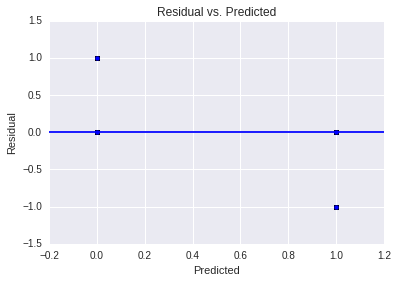

In [9]:
# Calculate the residuals for Homoscedasticity display.
residuals = y_test - predictions

plt.scatter(predictions, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## LASSO logistric regression
Carried out by specifying the ‘l1’ for the penalty parameters and leaving the parameter C to its default.

LASSO Mean accuracy of the model is: 0.80

LASSO Accuracy standard deviation for the model is: 0.04

----------------------------------------

LASSO Accuracy on training set: 0.910

LASSO Accuracy on test set: 0.835

LASSO RMSE of test set: 0.407


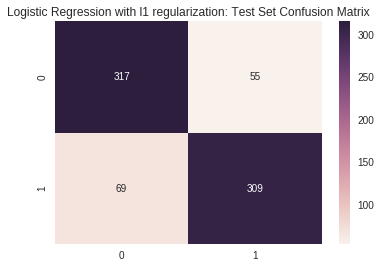

In [10]:
logreg = LogisticRegression(penalty='l1', C=.95)
results = cross_val_score(logreg, X, y, cv=15)

print("LASSO Mean accuracy of the model is: {:.2f}\n".format(np.mean(results)))
print("LASSO Accuracy standard deviation for the model is: {:.2f}\n".format(np.std(results)))
print("%s" % ('-' * 40))
# Fit the model and get predictions so that we can get the confusion matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
fit = logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
cnfsn_mtrx = metrics.confusion_matrix(y_test, predictions)
print("\nLASSO Accuracy on training set: {:.3f}".format(logreg.score(X_train, y_train)))
print("\nLASSO Accuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))

print('\nLASSO RMSE of test set: %.3f' % (np.sqrt(metrics.mean_squared_error(y_test, predictions))) )

# Display heatmap of confusion matrix
_ = sb.heatmap(cnfsn_mtrx, annot=True, fmt="d")
_ = plt.title("Logistic Regression with l1 regularization: Test Set Confusion Matrix")

The logistic regression with l1 regularization has a sensitivity of .82  and specificity of .85 and a misclassification rate of .17.  A slightly worse model than that of the logistic regression with l2 regularization.

## Conclusions

Three models, logistic regression, l1 and l2 regularization, were used to analysis negative and positive sentiment from product review web sites.

The logistic regression performed the poorest among the three.  The model had the highest Root Mean Squared Error. There was overfitting when comparing results between the accuracy of the training and test data sets.  It also had the highest misclassification rate when compared to the other models. 

All models revealed some amount of overfitting.
The logistic regression with l2  regularization (Ridge logistic regression) out performed the other two models. It has the lowest RMSE at 0.0398 and lowest misclassification rate of 0.16. 

The logistic regression with l1 regularization (LASSO logistic regression) performed marginally better than the plain logistic regression.  The l2 regularization out performed the two other variants perhaps due to the high level of correlated features.   Reducing the coefficients of correlated features towards similar values.  

After the sentence data has been tokenized the data set has over 5000 features. The resulting dataset is a large spares matrix containing only binary data points.  Each feature is not of a normal distribution and therefore the errors will not have a normal distribution.   There are possibly many features that have high degree of multicollinearity as there are some set of words that are most likely going to appear together in sentences with positive or negative sentiment.

In short considering the dataset , logistic regression and its variants are not the right model for sentiment analysis.  The requirements of linearity, multivariate normality of the residuals, homoscedasticity  and low multicollinearity can not be met with the data.


## References

1. https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences
